# SEIS 763-02 Group Project
# Predicting Student Retention Rate 
### Submitted by - Sravani Beegala, Kiel Auer, Eastman Michael, Tosin Omidiora

## 1. Loading Libraries and Dataset

In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Loading the dataset
dataset = pd.read_csv('C:/Users/Admin/Desktop/ML_Python/PROJECT/Experiment and Results/Retention_Data.csv')

# Defining Target variable

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,19].values

In [5]:
dataset.head()

,Number,Cohort_Year,Gender,1st_Generation_Student?,IPEDS_Ethnicity,IPEDS_Ethnicity_Desc,Citizenship_Type,Resident,Fall_1_Credits,HS_GPA,ACTC_SCORE,ACTM_SCORE,ACTE_SCORE,ACTR_SCORE,ACTS_SCORE,Transfer_Credits,AP_Credits,Pell,Fall_1_STEM?,Fall_2?
0,1,Fall 2009,F,N,13,White,Y,Resident,16,3.72,25,29,21,27,24,0.0,0,N,0,1
1,2,Fall 2009,F,N,13,White,Y,Resident,12,3.67,25,26,26,23,24,9.0,4,N,0,1
2,3,Fall 2009,M,Y,13,White,Y,Resident,13,3.99,27,28,25,29,27,20.0,20,N,1,1
3,4,Fall 2009,F,N,10,Asian,Y,Resident,16,3.84,29,27,31,30,26,2.7,0,N,0,1
4,5,Fall 2009,M,N,13,White,Y,Resident,13,3.39,28,26,24,31,29,8.0,8,N,1,1


In [6]:
dataset.shape

(6756, 20)

## 2. Dealing with Missing Values and Categorical variables

In [9]:
# checking for missing values
pd.isna(dataset).sum()

Number                      0
Cohort_Year                 0
Gender                      0
1st_Generation_Student?     0
IPEDS_Ethnicity             0
IPEDS_Ethnicity_Desc        0
Citizenship_Type            0
Resident                    0
Fall_1_Credits              0
HS_GPA                     20
ACTC_SCORE                  0
ACTM_SCORE                  0
ACTE_SCORE                  0
ACTR_SCORE                  0
ACTS_SCORE                  0
Transfer_Credits            0
AP_Credits                  0
Pell                        0
Fall_1_STEM?                0
Fall_2?                     0
dtype: int64

In [10]:
# Imputing missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
imputer.fit(X[:,[9,10]])
X[:,9:11]= imputer.transform(X[:,9:11])


In [12]:
# label encoding the Categorical features

from sklearn.preprocessing import LabelEncoder
labelencoder_X= LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X[:,6] = labelencoder_X.fit_transform(X[:,6])
X[:,7] = labelencoder_X.fit_transform(X[:,7])
X[:,17] = labelencoder_X.fit_transform(X[:,17])


In [13]:
# Performing one-hot encoding

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X= LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])
onehotencoder= OneHotEncoder(categorical_features=[1])
X = onehotencoder.fit_transform(X).toarray()

X[:,2] = labelencoder_X.fit_transform(X[:,2])
onehotencoder= OneHotEncoder(categorical_features=[2])
X = onehotencoder.fit_transform(X).toarray()

X[:,3] = labelencoder_X.fit_transform(X[:,3])
onehotencoder= OneHotEncoder(categorical_features=[3])
X = onehotencoder.fit_transform(X).toarray()

X[:,5] = labelencoder_X.fit_transform(X[:,5])
onehotencoder= OneHotEncoder(categorical_features=[5])
X = onehotencoder.fit_transform(X).toarray()

X[:,6] = labelencoder_X.fit_transform(X[:,6])
onehotencoder= OneHotEncoder(categorical_features=[6])
X = onehotencoder.fit_transform(X).toarray()

X[:,7] = labelencoder_X.fit_transform(X[:,7])
onehotencoder= OneHotEncoder(categorical_features=[7])
X = onehotencoder.fit_transform(X).toarray()

X[:,17] = labelencoder_X.fit_transform(X[:,17])
onehotencoder= OneHotEncoder(categorical_features=[17])
X = onehotencoder.fit_transform(X).toarray()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarnin

In [14]:
pd.DataFrame(X).shape

(6756, 37)

## 3. Splitting the data into train and test datasets

In [15]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

## 4. Normalizing the data

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

## 5. Feature Selection using Backward Elimination

In [18]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars= len(x[0])
    for i in range(0, numVars):
        obj_OLS= sm.OLS(y, x).fit()
        maxVar= max(obj_OLS.pvalues).astype(float)
        if maxVar> sl:
            for j in range(0, numVars-i):
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    obj_OLS.summary()
    return x

SL = 0.05
X_sig= X[:, [0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,
            22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]]
X_Modeled= backwardElimination(X_sig, SL)

In [19]:
pd.DataFrame(X_Modeled).shape

# Backward Elimination dropped 19 features

(6756, 18)

In [20]:
# Splitting the Modeled data into train and test datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_Modeled,y,test_size=0.3,random_state=0)

In [21]:
# Normalizing the Modeled data

from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

## 6. Fitting different classification models

### 6.1 Logistic Regression

In [45]:
#Fitting Logistic Regression to Training Set

from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression(random_state=0)
logreg.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred_logistic= logreg.predict(X_test)

#Print Model Accuracy
print("Accuracy by logistic regression:",logreg.score(X_test,y_test))


Accuracy by logistic regression: 0.8825851011346818


### 6.2 Support Vector Machine

In [49]:
from sklearn.svm import SVC

# linear svm
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Accuracy by linear SVM:",svm.score(X_test,y_test))

# kernel svm - rbf
kernel_svm_rbf = SVC()
kernel_svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = kernel_svm_rbf.predict(X_test)

print("Accuracy by RBF SVM:",kernel_svm_rbf.score(X_test,y_test))

# kernel svm - sigmoid
kernel_svm_sigmoid = SVC(kernel='sigmoid')
kernel_svm_sigmoid.fit(X_train, y_train)
y_pred_svm_sigmoid = kernel_svm_sigmoid.predict(X_test)

print("Accuracy by Sigmoid SVM:",kernel_svm_sigmoid.score(X_test,y_test))


# polynomial svm
#degree 3
svm_poly3 = SVC(kernel='poly', degree=3)
svm_poly3.fit(X_train, y_train)
y_pred_svm_poly3 = svm_poly3.predict(X_test)

print("Accuracy by Poly SVM - degree 3:",svm_poly3.score(X_test,y_test))

#degree 10
svm_poly10= SVC(kernel='poly', degree=10)
svm_poly10.fit(X_train, y_train)
y_pred_svm_poly10 = svm_poly10.predict(X_test)

print("Accuracy by Poly SVM - degree 10:",svm_poly10.score(X_test,y_test))

#degree 20
svm_poly20= SVC(kernel='poly', degree=20)
svm_poly20.fit(X_train, y_train)
y_pred_svm_poly20 = svm_poly20.predict(X_test)

print("Accuracy by Poly SVM - degree 20:",svm_poly20.score(X_test,y_test))



Accuracy by linear SVM: 0.882091761223483
Accuracy by RBF SVM: 0.8811050814010853
Accuracy by Sigmoid SVM: 0.8154908732116428
Accuracy by Poly SVM - degree 3: 0.882091761223483
Accuracy by Poly SVM - degree 10: 0.8677849037987173
Accuracy by Poly SVM - degree 20: 0.8643315244203256


### 6.3 k Nearest Neighbour 

Minimum error rate using k-NN: 0.11790823877651702
K : 20


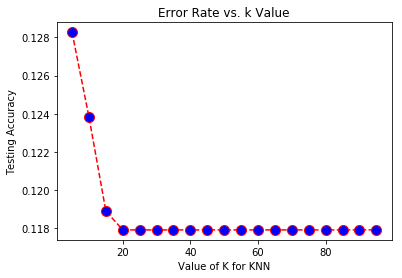

In [27]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(5,100,5)
knn_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,p=2,metric='minkowski')
    knn.fit(X_train, y_train)
    knn_scores.append(1-(knn.score(X_test,y_test)))

# plot the relationship between K and error
# plt.plot(x_axis, y_axis)
plt.plot(k_range, knn_scores,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. k Value')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

print("Minimum error rate using k-NN:",min(knn_scores))
print("K :",k_range[knn_scores.index(min(knn_scores))])

In [28]:
# k-NN is selected at k = 20

KNN = KNeighborsClassifier(n_neighbors=20, p=2, metric='minkowski')
KNN.fit(X_train, y_train)

y_pred_knn = KNN.predict(X_test)

#Model Accuracy
print("Accuracy by k-NN:",KNN.score(X_test,y_test))

Accuracy by k-NN: 0.882091761223483


### 6.4 Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

#Model Accuracy
print("Accuracy by Naive Bayes:",gnb.score(X_test,y_test))

Accuracy by Naive Bayes: 0.8317710902812038


### 6.5 Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train,y_train)

#Making predictions on the Test Set
y_pred_decisiontree= tree.predict(X_test)

#Print Model Accuracy
print("Accuracy by Decision tree",tree.score(X_test,y_test))

Accuracy by Decision tree 0.7923038973852985


### 6.6 Random Forest

Minimum error rate using Random Forest: 0.14948199309324128
n_estimators : 75


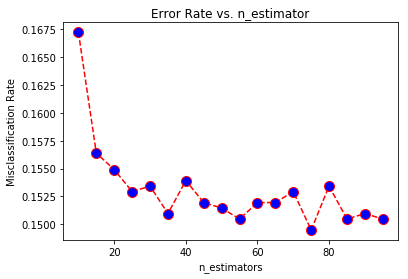

In [33]:
from sklearn.ensemble import RandomForestClassifier


n_range = range(10,100,5)
scores_rfc = []

for n in n_range:
    rfc = RandomForestClassifier(n_estimators=n,criterion='entropy',random_state = 0)
    rfc.fit(X_train,y_train)
    scores_rfc.append((1-rfc.score(X_test,y_test)))
    
# plotting the n_estimators values and the misclassification rate

plt.plot(n_range, scores_rfc,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. n_estimator')
plt.xlabel('n_estimators')
plt.ylabel('Misclassification Rate')

print("Minimum error rate using Random Forest:",min(scores_rfc))
print("n_estimators :",n_range[scores_rfc.index(min(scores_rfc))])

In [34]:
# Random Forest is selected at n = 75

# Random Forest at selected n_estimators
rfc_champion = RandomForestClassifier(n_estimators= 75,criterion='entropy')
rfc_champion.fit(X_train,y_train)
y_pred_rfc = rfc_champion.predict(X_test)

print("Accuracy by Random Forest: ",rfc_champion.score(X_test,y_test))

Accuracy by Random Forest:  0.8539713862851505


## 7. Dimensionality Reduction 

### 7.1 Using PCA

In [37]:
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=2)
X_train_pca = pcaObj.fit_transform(X_train)
X_test_pca = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_

#Fitting Logistic Regression to Training Set

classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_pca, y_train)

#Model Accuracy
print("Accuracy using PCA: ",classifierObj.score(X_test_pca,y_test))


Accuracy using PCA:  0.882091761223483


### 7.2 Using LDA 

In [42]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=2)
X_train_lda = ldaObj.fit_transform(X_train,y_train)
X_test_lda = ldaObj.transform(X_test)
components_variance = ldaObj.explained_variance_ratio_

classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_lda, y_train)

#Model Accuracy
print("Accuracy using LDA: ",classifierObj.score(X_test_lda,y_test))


Accuracy using LDA:  0.8835717809570794


### 7.3 Using Kernel PCA

In [44]:
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca = kernelPCAObj.fit_transform(X_train)
X_test_kpca = kernelPCAObj.transform(X_test)

classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_kpca, y_train)

#Model Accuracy
print("Accuracy using Kernel PCA: ",classifierObj.score(X_test_kpca,y_test))


Accuracy using Kernel PCA:  0.882091761223483


## 8. Ensemble Model

In [50]:

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('lr',logreg),
                                        ['knn',KNN],
                                        ['svm',svm],
                                        ['gnb',gnb],
                                        ['rf',rfc_champion]],
                                        voting='hard')

ensemble.fit(X_train,y_train)
print("Accuracy with the Ensemble Model:", ensemble.score(X_test,y_test))



Accuracy with the Ensemble Model: 0.882091761223483


### Of all the models, Logistic Regression with LDA has given the best accuracy - 88.35%